# Holocene Climate Data Analysis
An exploration of holocene climate as a way of learning the `pandas` package.  Uses reconstructed holocene climate data provided in Michael P. Erb, Nicholas P. McKay, Nathan Steiger, Sylvia Dee, Chris Hancock, Ruza F. Ivanovic, Lauren J. Gregoire, & Paul Valdes. (2022). *Holocene temperature reconstruction using paleoclimate data assimilation (1.0.0-beta) [Data set]*. Zenodo. https://doi.org/10.5281/zenodo.6426332.  This is fully described in Erb, M. P., McKay, N. P., Steiger, N., Dee, S., Hancock, C., Ivanovic, R. F., Gregoire, L. J., and Valdes, P.: *Reconstructing Holocene temperatures in time and space using paleoclimate data assimilation*, Clim. Past, 18, 2599–2629, https://doi.org/10.5194/cp-18-2599-2022, 2022.

In [2]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset(r"data/holocene_reconstruction.nc", engine="netcdf4")

# Display the dataset structure to inspect its layers (variables and dimensions)
ds

<xarray.Dataset> Size: 4GB
Dimensions:                (ages: 1200, lat: 64, lon: 96, ens_selected: 100,
                            ens: 1002, proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 256B -88.59 -85.78 ... 85.78 88.59
  * lon                    (lon) float32 384B 0.0 3.75 7.5 ... 348.8 352.5 356.2
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat, lon) float32 29MB ...
    recon_tas_ens          (ages, ens_selected, lat, lon) float32 3GB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat, lon) float32 29MB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

In [5]:
# Define the bounding box for the UK region
lon_min, lat_min, lon_max, lat_max = -7.57216793459, 49.959999905, 1.68153079591, 58.6350001085

# Select the spatial subset for the UK
dsuk = ds.sel(
    lon=slice(lon_min, lon_max),
    lat=slice(lat_min, lat_max)
)

# Display the subsetted dataset structure
dsuk

<xarray.Dataset> Size: 662MB
Dimensions:                (ages: 1200, lat: 3, lon: 1, ens_selected: 100,
                            ens: 1002, proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 12B 52.03 54.84 57.66
  * lon                    (lon) float32 4B 0.0
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat, lon) float32 14kB ...
    recon_tas_ens          (ages, ens_selected, lat, lon) float32 1MB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat, lon) float32 14kB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

In [6]:
# Create a new xarray.Dataset containing only the 'recon_tas_mean' variable from dsuk
dsuk_tas_mean = dsuk[['recon_tas_mean']]
dsuk_tas_mean

<xarray.Dataset> Size: 19kB
Dimensions:         (ages: 1200, lat: 3, lon: 1)
Coordinates:
  * ages            (ages) float32 5kB 4.5 14.5 24.5 ... 1.198e+04 1.199e+04
  * lat             (lat) float32 12B 52.03 54.84 57.66
  * lon             (lon) float32 4B 0.0
Data variables:
    recon_tas_mean  (ages, lat, lon) float32 14kB ...
Attributes:
    title:    Holocene climate reconstruction

In [20]:
# Select a temporal subset 

dsuk_now = dsuk.sel(
    ages=slice(4.5)
)

# Display the subsetted dataset structure
# Plot the 'recon_tas_mean' variable as a map for the selected time slice
dsuk_now['recon_tas_mean']
#dsuk_now['recon_tas_mean'].squeeze.plot(x='lon', y='lat', cmap='coolwarm')

<xarray.DataArray 'recon_tas_mean' (ages: 1, lat: 3, lon: 1)> Size: 12B
[3 values with dtype=float32]
Coordinates:
  * ages     (ages) float32 4B 4.5
  * lat      (lat) float32 12B 52.03 54.84 57.66
  * lon      (lon) float32 4B 0.0

In [53]:
#Temperature series for middle quadrant of Uk at lon 0, lat 54.84
temperature = ds.sel(lon=0, 
                     lat=[52.03, 54.84, 57.66],  #54.84, 
                     method='nearest')



In [63]:
# Add a new coordinate 'year' to the temperature dataset by subtracting 'ages' from 2025
temperature = temperature.assign_coords(year=2025 - temperature.ages)
# Convert the 'year' coordinate to integer type
temperature = temperature.assign_coords(year=temperature.year.astype(int))
temperature 

<xarray.Dataset> Size: 662MB
Dimensions:                (ages: 1200, lat: 3, ens_selected: 100, ens: 1002,
                            proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 12B 52.03 54.84 57.66
    lon                    float32 4B 0.0
    year                   (ages) int64 10kB 2020 2010 2000 ... -9959 -9969
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat) float32 14kB ...
    recon_tas_ens          (ages, ens_selected, lat) float32 1MB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat) float32 14kB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

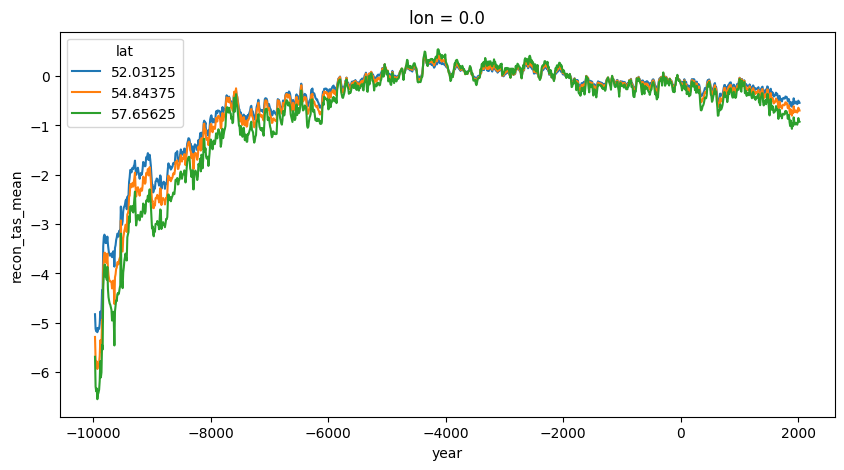

In [64]:
tempmean = temperature['recon_tas_mean']

tempmean.squeeze().plot.line(x='year',
                             hue = 'lat', 
                             figsize=(10, 5))

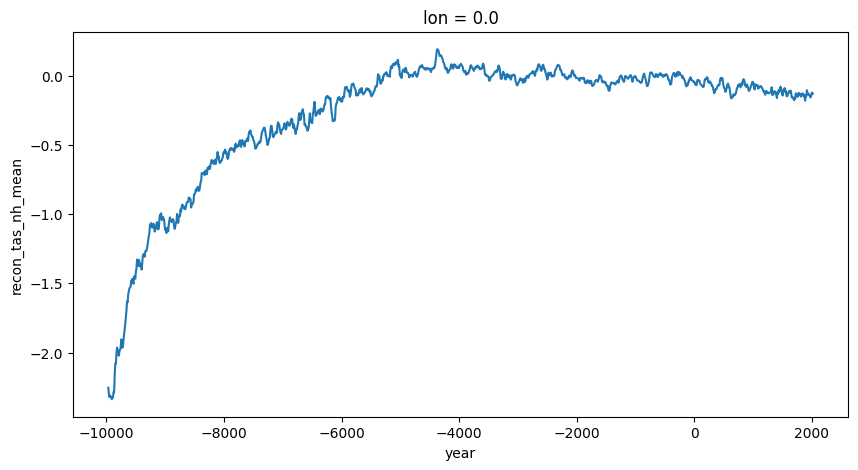

In [71]:
tempmean = temperature['recon_tas_nh_mean'].mean(dim='ens')

tempmean.squeeze().plot.line(x='year',
                             figsize=(10, 5))

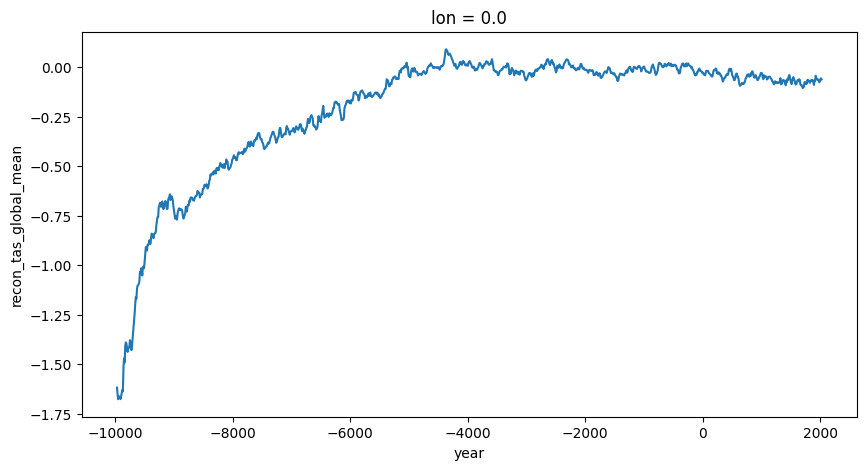

In [75]:
tempmean = temperature['recon_tas_global_mean'].mean(dim='ens')

tempmean.squeeze().plot.line(x='year',
                             figsize=(10, 5))